In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('ride.csv')

ابتدا به بررسی هیستوگرام ورود های می پردازیم
برای پارامتر زمان و مسافت بیشترین تمرکز در سمت چپ نمودار است و برای قیمت دو نقطه وسط و چپ بیشترین تمرکز را دارند

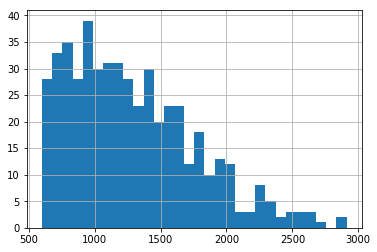

In [2]:
data['duration'].hist(bins = 30)

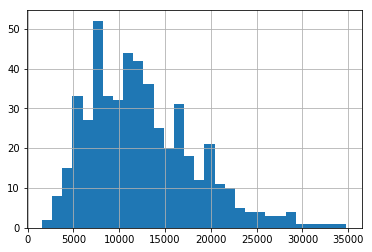

In [3]:
data['distance'].hist(bins = 30)

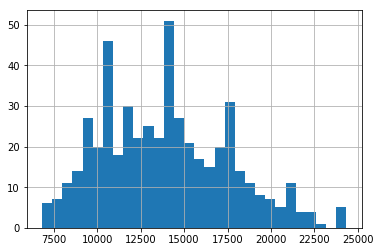

In [4]:
data['price'].hist(bins = 30)

حال به نمودار اسکتر داده ها نگاه می کنیم همانطور که مشاهده میشود توزیع مایل به خطی است

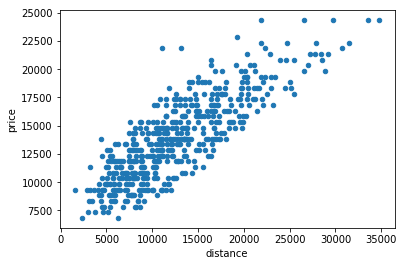

In [5]:
data.plot(kind='scatter', x='distance', y='price')

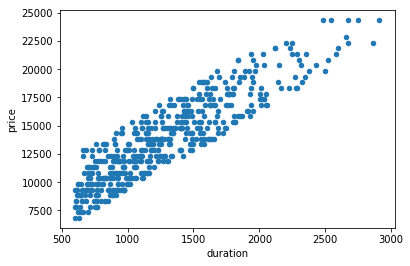

In [6]:
data.plot(kind='scatter', x='duration', y='price')

این هم تابع خط پیش بینی شده
برای محاسبه خط یک نقطه میانگین نقطه فرض شد و نقطه دیگر آن بین نقاط مختلف تست شد و گزینه داری کمترین خطای آن انتخاب شد
برای بررسی نمودار قیمت زمان انتخاب شد

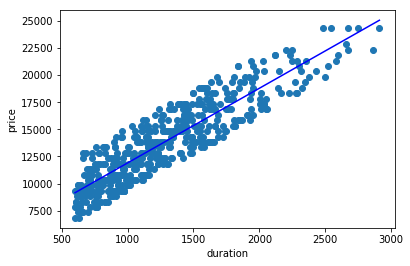

error is 1291728160.0298507


In [7]:
def estimate(time,slope,intercept):
    return time*slope+intercept
def calc_error(data,slope,intercept):
    return_value = 0
    for index, item in data.iterrows():
        return_value += (estimate(item['duration'],slope,intercept)-item['price'])**2
    return return_value
min_error     = -1
duration_mean = data['duration'].mean()
price_mean = data['price'].mean()
for i in range(0,data.shape[0]):
    test_slope = (price_mean - data['price'][i])/(duration_mean - data['duration'][i])
    test_intercept = price_mean - test_slope*duration_mean
    error = calc_error(data,test_slope,test_intercept)
    if min_error == -1 or min_error>error:
        min_error      = error
        best_slope     = test_slope
        best_intercept = test_intercept

plt.scatter(data['duration'], data['price'])
plt.xlabel('duration')
plt.ylabel('price')

x = np.linspace(data['duration'].min(),data['duration'].max())
y = estimate(x,best_slope,best_intercept)
plt.plot(x,y, 'b-')
plt.show()
print ("error is " + str(min_error))

جدول خروجی آن در ازای ده ورودی رندوم مشابه زیر میشود

In [8]:
import random
my_randoms = np.array(random.sample(range(500,3000), 10))
my_randoms.sort()
answers    = estimate(my_randoms,best_slope,best_intercept)
table = np.array([my_randoms,answers]).transpose()
pd.DataFrame(table)

,0,1
0,558.0,8862.530566
1,607.0,9199.684782
2,818.0,10651.512121
3,956.0,11601.048486
4,1386.0,14559.748751
5,1420.0,14793.692492
6,1640.0,16307.446116
7,2095.0,19438.163839
8,2601.0,22919.797174
9,2918.0,25100.978532
